In [112]:
from seaborn import load_dataset
import matplotlib.pyplot as plt
from matplotlib import test
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import accuracy_score , classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [113]:
penguins = load_dataset('penguins')

penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


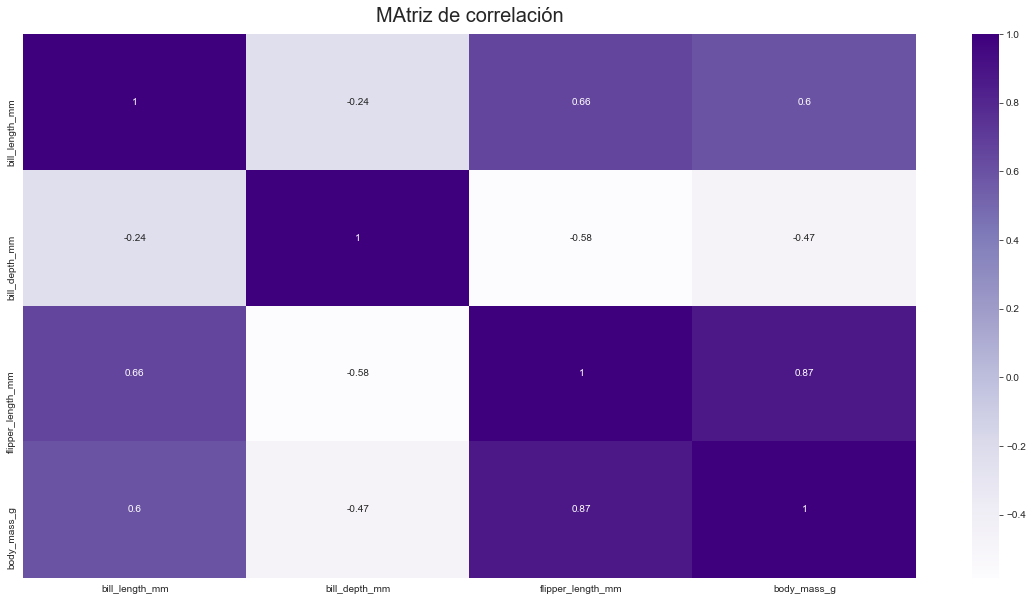

In [114]:
#EDA

#Decido visualizar una matriz de correlación para identificar las variables que son de importancia y se relacionan entre sí

plt.figure(figsize=(20,10))
heatmap = sns.heatmap(penguins.corr(), cmap='Purples',annot=True)
heatmap.set_title('MAtriz de correlación', fontdict={'fontsize':20}, pad=12);

In [115]:
#Antes de continuar con el análisis, prefiero hacer la limpieza de datos para no tener ruido en mi dataset

#Visualizo mis registros con el tipo de dato
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [116]:
#Verifico si existen valores nulos en mi datset
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [117]:
#visualizo la descripción de mi dataset

penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [118]:
# Hago un drop para eliminar las columnas que tienen valores nulos 

penguins.drop(penguins[penguins['body_mass_g'].isnull()].index,axis=0, inplace=True)

In [119]:
#en la columna de 'sex' lleno con Male a los valores nulos

penguins['sex'] = penguins['sex'].fillna('Male')

In [120]:
#confirmo q ya no tengo valores nulos:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

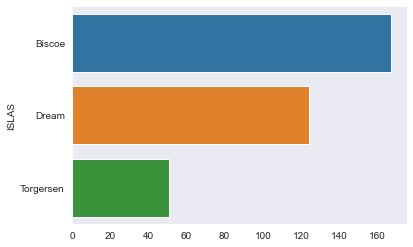

In [121]:
#Hago un análisis sobre qué isla contiene más pinguinos
df = penguins['island'].value_counts().reset_index()

fig = sns.barplot(data=df, x='island', y='index')
fig.set(xlabel='', ylabel='ISLAS')
plt.show()

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

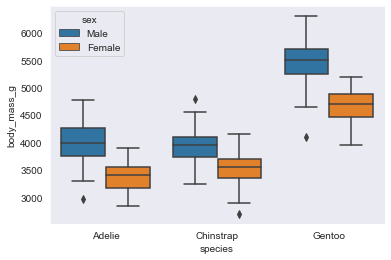

In [122]:
#Visualizo un gráfico para identificar a los pinguinos por sexo, especie y body_mass
sns.set_style('dark')
sns.boxplot(x=penguins.species,y=penguins.body_mass_g,hue=penguins.sex)

In [123]:
#Mi variable objetivo es de tipo objeto(string), por lo cual la voy a transformar a numérica
from sklearn.preprocessing import LabelEncoder
nume = LabelEncoder()

penguins['species'] = nume.fit_transform(penguins['species'])

In [124]:
#Compruebo que mi variable objetivo ahora es de tipo int
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    int32  
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), int32(1), object(2)
memory usage: 30.0+ KB


In [125]:
#Clasifico los datos en etiquetas

x=penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y=penguins['species']

In [126]:
#Preparo y divido mis datos para train y test
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state=42)

In [127]:
# estoy estandarizando mis variables de train y test
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
trainX = ss.fit_transform(trainX)
testX = ss.fit_transform(testX)

In [128]:
#Decidí utilizar el modelo SVC
svc = SVC()

svc.fit(trainX, trainY)

y_predict= svc.predict(testX)

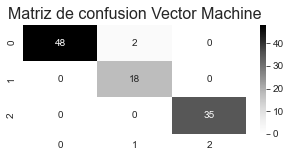

In [129]:
plt.figure(figsize= (5,2)) 
plt.title("Matriz de confusion Vector Machine", fontsize=16) 
sns.heatmap(confusion_matrix(testY, y_predict), annot = True, cmap='Greys', fmt='.0f')    
plt.show()

In [130]:
svc_accur= accuracy_score(testY, y_predict)
print(svc_accur)

0.9805825242718447
